## Data

The dataset describes the daily BTC price from 2017-08-17 to date.
The currency is USD and there are 1303 obeservations as at 10/03/2021
The source of the data is from Binance

### Dictionnary
Unix Timestamp - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone

Date - This timestamp is converted to NY EST Standard Time

Symbol - The symbol for which the timeseries data refers

Open - This is the opening price of the time period

High - This is the highest price of the time period

Low - This is the lowest price of the time period

Close - This is the closing price of the time period

Volume (Crypto) - This is the volume in the transacted Ccy. Ie. For BTC/USDT, this is in BTC amount

Volume Base Ccy - This is the volume in the base/converted ccy. Ie. For BTC/USDT, this is in USDT amount

Trade Count - This is the unique number of trades for the given time period

In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"

# Import ssl library and tweak one setting due to fact we use HTTPS certificate(s)

import ssl  
ssl._create_default_https_context = ssl._create_unverified_context

# Now we want to create a dataframe and use Pandas' to_csv function to read in our file


df_crypto = pd.read_csv(url, skiprows=1, parse_dates = True, squeeze = True) # we use skiprows parameter because first row contains our web address

# Diplay the first 5 rows
df_crypto.head(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.615334e+12,2021-03-10 00:00:00,BTC/USDT,54874.67,55577.78,54782.93,55575.19,2706.867241,1.490111e+08,62123.0
1,1.615248e+12,2021-03-09 00:00:00,BTC/USDT,52375.18,54895.00,51789.41,54884.50,71656.737076,3.861451e+09,2194398.0
2,1.615162e+12,2021-03-08 00:00:00,BTC/USDT,50959.11,52402.78,49274.67,52375.17,66987.359664,3.400848e+09,1999401.0
3,1.615075e+12,2021-03-07 00:00:00,BTC/USDT,48882.20,51450.03,48882.20,50971.75,55235.028032,2.778876e+09,1758101.0
4,1.614989e+12,2021-03-06 00:00:00,BTC/USDT,48746.81,49200.00,47070.00,48882.20,44399.234242,2.143911e+09,1476474.0


In [127]:
df_crypto.dtypes

unix           float64
date            object
symbol          object
open           float64
high           float64
low            float64
close          float64
Volume BTC     float64
Volume USDT    float64
tradecount     float64
dtype: object

In [128]:
df_crypto['date'] = df_crypto['date'].astype("str")
all_pricess= df_crypto['date']
all_pricess

0       2021-03-10 00:00:00
1       2021-03-09 00:00:00
2       2021-03-08 00:00:00
3       2021-03-07 00:00:00
4       2021-03-06 00:00:00
               ...         
1298             2017-08-21
1299             2017-08-20
1300             2017-08-19
1301             2017-08-18
1302             2017-08-17
Name: date, Length: 1303, dtype: object

In [129]:
# dataset size 
total_observations = df_crypto.shape
total_observations

(1303, 10)

In [130]:
# getting basic information on the data
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1303 non-null   float64
 1   date         1303 non-null   object 
 2   symbol       1303 non-null   object 
 3   open         1303 non-null   float64
 4   high         1303 non-null   float64
 5   low          1303 non-null   float64
 6   close        1303 non-null   float64
 7   Volume BTC   1303 non-null   float64
 8   Volume USDT  1303 non-null   float64
 9   tradecount   1179 non-null   float64
dtypes: float64(8), object(2)
memory usage: 101.9+ KB


In [131]:
df_crypto.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USDT', 'tradecount'],
      dtype='object')

In [132]:
# Getting the list of the indices
df_crypto.index.values

array([   0,    1,    2, ..., 1300, 1301, 1302])

## Let's clean the data set to remove a few unnecessary columns and values

In [133]:
# Drop Unix timestamp symbol columns  
df_crypto.drop(['unix'], axis=1, inplace=True)
df_crypto.drop(['symbol'], axis=1, inplace=True)
#df_crypto.head(5)
df_crypto.tail(5)

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
1298,2017-08-21,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,NaN
1299,2017-08-20,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN
1300,2017-08-19,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN
1301,2017-08-18,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN
1302,2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN


In [134]:
# remove datetime
df_crypto['date'] = df_crypto['date'].apply(pd.to_datetime)
df_crypto.tail(5)

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
1298,2017-08-21,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,NaN
1299,2017-08-20,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN
1300,2017-08-19,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN
1301,2017-08-18,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN
1302,2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN


## 1.  Identify and handle missing values in the new data frame

The missing values are automatically converted to Python's default (NaN). We use Python's built-in functions, .isnull(), to identify these missing values. 


In [135]:
#Exploratory data analysis
missing_data = df_crypto.isnull()
missing_data.tail(5)

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
1298,False,False,False,False,False,False,False,True
1299,False,False,False,False,False,False,False,True
1300,False,False,False,False,False,False,False,True
1301,False,False,False,False,False,False,False,True
1302,False,False,False,False,False,False,False,True


In [136]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
price = df_crypto[['open', 'date']]


In [137]:
price.plot

## 1.2 Count missing values in each column
By using a for loop in Python, we will figure out the number of missing values in each column. In the above table, "True" represents a missing value, "False" indicates whether the value is present in the dataset.  

In, addition we will also calculate the percentage of missing values for each feature.  

Any feature which contains more than three-quarter (75%) of missing values will be dropped from the dataset.

In [138]:
for column in missing_data.columns.values.tolist():
    print(column)
    total_observations = 1289 # total of accidents by using the severity code.
    print (missing_data[column].value_counts()/ total_observations)
    print(df_crypto[column].value_counts())
    print("")   

date
False    1.010861
Name: date, dtype: float64
2017-12-18    2
2019-07-06    1
2018-07-22    1
2018-10-05    1
2020-04-15    1
             ..
2019-05-18    1
2020-09-16    1
2018-01-13    1
2019-06-30    1
2020-02-11    1
Name: date, Length: 1302, dtype: int64

open
False    1.010861
Name: open, dtype: float64
13500.00    2
9230.00     2
8346.86     1
9192.93     1
6065.89     1
           ..
52375.18    1
3590.57     1
18541.29    1
7738.58     1
7946.89     1
Name: open, Length: 1301, dtype: int64

high
False    1.010861
Name: high, dtype: float64
6360.00     3
7750.00     3
9395.00     3
10500.00    2
7700.00     2
           ..
8134.73     1
4006.81     1
4450.38     1
36415.31    1
15840.00    1
Name: high, Length: 1258, dtype: int64

low
False    1.010861
Name: low, dtype: float64
10200.00    3
10080.00    3
8000.00     3
6901.00     2
8005.00     2
           ..
7015.00     1
4222.94     1
12812.00    1
3830.00     1
11200.00    1
Name: low, Length: 1258, dtype: int64

close

In [139]:
df_crypto.describe()

,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1.179000e+03
mean,10282.293546,10617.728872,9917.057391,10321.522694,47242.172420,5.964112e+08,5.869040e+05
std,8392.833289,8773.985045,8007.080606,8484.560562,35742.824251,9.351276e+08,5.846163e+05
min,3189.020000,3276.500000,2817.000000,3189.020000,225.760000,9.677533e+05,1.241700e+04
25%,6455.330000,6580.500000,6313.035000,6460.330000,25896.284121,1.784091e+08,2.210575e+05
50%,8292.670000,8543.000000,8083.010000,8300.090000,39924.745141,3.201768e+08,3.747600e+05
75%,10526.680000,10819.420000,10171.965000,10535.835000,61427.996295,5.599294e+08,6.928245e+05
max,57412.350000,58352.800000,55477.590000,57408.570000,402201.673764,8.426880e+09,4.431451e+06


## Calculate the mean value for 'tradecount' column

In [140]:
avg_tradecount=df_crypto['tradecount'].astype('float').mean(axis=0)
print("Average of bore:", avg_tradecount)

Average of bore: 586904.0466497032


## Calculate the median value for 'tradecount' column

In [141]:
median_tradecount=df_crypto['tradecount'].astype('float').median(axis=0)
print("Average of bore:", median_tradecount)

Average of bore: 374760.0


In [142]:
df_crypto.tail(5)

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
1298,2017-08-21,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,NaN
1299,2017-08-20,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN
1300,2017-08-19,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN
1301,2017-08-18,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN
1302,2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN


In [143]:
#Replace NaN by mean value
df_crypto["tradecount"].replace(np.nan, median_tradecount, inplace=True)

## 2. Checking for no missing values

In [144]:
df_crypto.tail(5)

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
1298,2017-08-21,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,374760.0
1299,2017-08-20,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,374760.0
1300,2017-08-19,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,374760.0
1301,2017-08-18,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,374760.0
1302,2017-08-17,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,374760.0


In [145]:
df_crypto.isnull().sum().to_frame()

,0
date,0
open,0
high,0
low,0
close,0
Volume BTC,0
Volume USDT,0
tradecount,0


## 3. Data Format

In [146]:
# Lets list the data types for each column
df_crypto.dtypes

date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
Volume BTC            float64
Volume USDT           float64
tradecount            float64
dtype: object

## 4. Data Visualisation

### 4.1 For consistency, ensure that all column labels of type string

In [147]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_crypto.columns)

True

All the columns are of type of string, as the above code returns "True"

df_crypto.columns = list(map(str, df_crypto.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_crypto.columns)

### 4.2 Set the date name as index - useful for quickly looking up date using .loc metho

In [148]:
#df_crypto[["date"]] = df_crypto[["date"]].astype("int")

In [149]:
df_crypto.dtypes

date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
Volume BTC            float64
Volume USDT           float64
tradecount            float64
dtype: object

In [150]:
df_crypto.set_index('date', inplace=True)
df_crypto.head(5)

,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,
2021-03-10,54874.67,55577.78,54782.93,55575.19,2706.867241,1.490111e+08,62123.0
2021-03-09,52375.18,54895.00,51789.41,54884.50,71656.737076,3.861451e+09,2194398.0
2021-03-08,50959.11,52402.78,49274.67,52375.17,66987.359664,3.400848e+09,1999401.0
2021-03-07,48882.20,51450.03,48882.20,50971.75,55235.028032,2.778876e+09,1758101.0
2021-03-06,48746.81,49200.00,47070.00,48882.20,44399.234242,2.143911e+09,1476474.0


# To remove the name of the index
df_crypto.index.name = None
df_crypto.head(3)

In [151]:
# 1. the full row data (all columns)
print(df_crypto.loc['2021-02-28'])

                open      high      low     close    Volume BTC   Volume USDT  \
date                                                                            
2021-02-28  46103.67  46638.46  43000.0  45135.66  83055.369042  3.708360e+09   

            tradecount  
date                    
2021-02-28   1838345.0  


In [152]:
#df_crypto.columns = list(map(str, df_crypto.columns))
df_crypto.dtypes

open           float64
high           float64
low            float64
close          float64
Volume BTC     float64
Volume USDT    float64
tradecount     float64
dtype: object

In [153]:
print(df_crypto.loc['2021-02-28', 'open'])

date
2021-02-28    46103.67
Name: open, dtype: float64


In [154]:
df_crypto.columns = list(map(str, df_crypto.columns))

In [155]:
date = list(map(str, range(2017, 2021)))
date

['2017', '2018', '2019', '2020']

## 5. Volume Magnitude

Text(0.5, 1.0, 'Volume USDT bins')

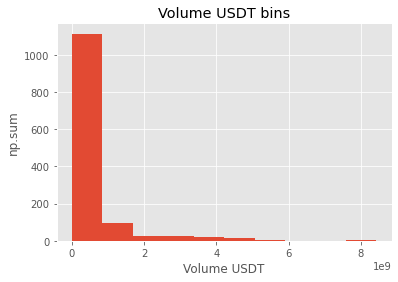

In [156]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df_crypto["Volume USDT"])

# set x/y labels and plot title
plt.pyplot.xlabel("Volume USDT")
plt.pyplot.ylabel("np.sum")
plt.pyplot.title("Volume USDT bins")

In [157]:
bins = np.linspace(min(df_crypto["Volume USDT"]), max(df_crypto["Volume USDT"]), 4)
bins

array([9.67753320e+05, 2.80960509e+09, 5.61824243e+09, 8.42687977e+09])

In [158]:
group_names = ['Low', 'Medium', 'High']

In [159]:
df_crypto['Volume USDT-binned'] = pd.cut(df_crypto['Volume USDT'], bins, labels=group_names, include_lowest=True )
df_crypto[['Volume USDT','Volume USDT-binned']].head(20)

,Volume USDT,Volume USDT-binned
date,,
2021-03-10,1.490111e+08,Low
2021-03-09,3.861451e+09,Medium
2021-03-08,3.400848e+09,Medium
2021-03-07,2.778876e+09,Low
2021-03-06,2.143911e+09,Low
2021-03-05,3.727133e+09,Medium
2021-03-04,4.079837e+09,Medium
2021-03-03,4.109521e+09,Medium
2021-03-02,3.120472e+09,Medium


In [160]:
df_crypto['Volume USDT-binned'].value_counts()

Low       1243
Medium      55
High         5
Name: Volume USDT-binned, dtype: int64

Text(0.5, 1.0, 'Volume USDT bins')

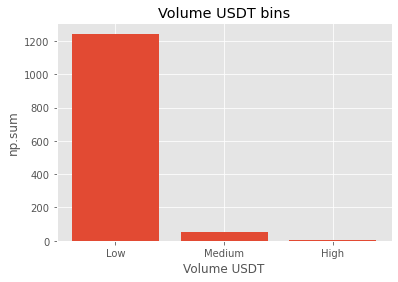

In [161]:
# Plot the distribution of each bin

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df_crypto['Volume USDT-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Volume USDT")
plt.pyplot.ylabel("np.sum")
plt.pyplot.title("Volume USDT bins")

## 5. Statistic analysis
The target variable is open price.The aim is to investigate which attributes impact the open price

<AxesSubplot:xlabel='open', ylabel='close'>

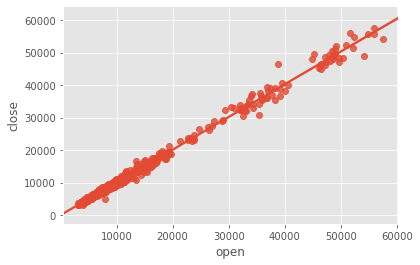

In [162]:
# 'close' price size as potential predictor variable of 'open' price

import seaborn as sns
%matplotlib inline

sns.regplot(x="open", y="close", data=df_crypto)

In [163]:
df_crypto[["open","close"]].corr()

,open,close
open,1.000000,0.997244
close,0.997244,1.000000


## Let's calculate the  Pearson Correlation Coefficient and P-value of 'open' and 'close'prices

In [164]:
#We can obtain this information using "stats" module in the "scipy" library.
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df_crypto['open'], df_crypto['close'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9972443414616998  with a P-value of P = 0.0


## Strong correlation postive between Open and close price. Since the p-value is ~0, the correlation between open price and close price is statistically significant, with a strong linear relationship (0.99).

<AxesSubplot:xlabel='open', ylabel='high'>

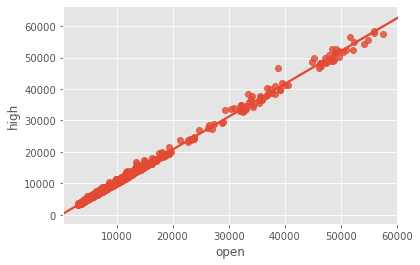

In [165]:
sns.regplot(x="open", y="high", data=df_crypto)

<AxesSubplot:xlabel='open', ylabel='tradecount'>

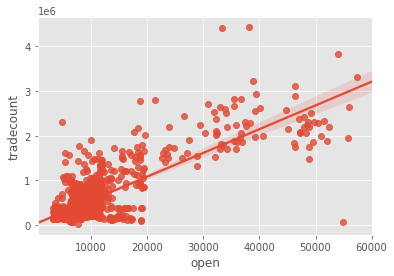

In [166]:
sns.regplot(x="open", y="tradecount", data=df_crypto)

<AxesSubplot:xlabel='open', ylabel='Volume USDT'>

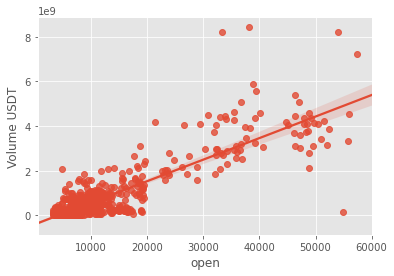

In [167]:
sns.regplot(x="open", y="Volume USDT", data=df_crypto)

In [168]:
#We can obtain this information using "stats" module in the "scipy" library.
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df_crypto['open'], df_crypto['Volume USDT'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8659159166296158  with a P-value of P = 0.0


## Strong correlation postive between Open price and Volume USDT. Since the p-value is ~0, the correlation between open price and Volume USDT is statistically significant, with a strong linear relationship (0.99).

In [169]:
# Let's visualise quickly the correlation matrix for the key attributes
df_crypto[["open","close", "high","low","Volume USDT"]].corr()

,open,close,high,low,Volume USDT
open,1.000000,0.997244,0.998581,0.997341,0.865916
close,0.997244,1.000000,0.998930,0.998391,0.863561
high,0.998581,0.998930,1.000000,0.997264,0.872766
low,0.997341,0.998391,0.997264,1.000000,0.852887
Volume USDT,0.865916,0.863561,0.872766,0.852887,1.000000
